In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
import os
FIG_DIR = '/home/harish/Dropbox/Apps/Overleaf/AIES_DL_based_Spatial_reconstruction_of_meteorological_variables_measured_by_sparse_stations'
if not os.path.exists(FIG_DIR):
    FIG_DIR = 'Figures'

In [72]:
cap_alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
small_alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                  'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [3]:
df_nysm = pd.read_csv("nysm.csv", index_col=0)
df_nysm

,number,name,lat [degrees],lon [degrees],elevation [m],county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
stid,,,,,,,,,,,,,,,
ADDI,107,Addison,42.040360,-77.237260,507.6140,Steuben,Addison,NY,6.9,S,1,Western Plateau,BGM,2016-08-10 18:15:00 UTC,NaN
ANDE,111,Andes,42.182270,-74.801390,518.2820,Delaware,Andes,NY,1.5,WSW,2,Eastern Plateau,BGM,2016-08-04 15:55:00 UTC,NaN
BATA,24,Batavia,43.019940,-78.135660,276.1200,Genesee,Batavia,NY,4.9,ENE,9,Great Lakes,BUF,2016-02-18 18:40:00 UTC,NaN
BEAC,76,Beacon,41.528750,-73.945270,90.1598,Dutchess,Beacon,NY,3.3,NE,5,Hudson Valley,ALY,2016-08-22 16:45:00 UTC,NaN
BELD,90,Belden,42.223220,-75.668520,470.3700,Broome,Belden,NY,2.2,NNE,2,Eastern Plateau,BGM,2015-11-30 20:20:00 UTC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WFMB,14,Whiteface Mountain Base,44.393236,-73.858829,614.5990,Essex,Wilmington,NY,3.5,W,7,Champlain Valley,BTV,2016-01-29 20:55:00 UTC,NaN
WGAT,123,Woodgate,43.532408,-75.158597,442.9660,Oneida,Woodgate,NY,1.4,NNW,3,Northern Plateau,BGM,2016-08-29 18:20:00 UTC,NaN
WHIT,10,Whitehall,43.485073,-73.423071,36.5638,Washington,Whitehall,NY,8.0,S,7,Champlain Valley,ALY,2015-08-26 20:30:00 UTC,NaN


In [4]:
lat_lon = df_nysm[["lat [degrees]", "lon [degrees]"]].values
lat_lon.shape

(126, 2)

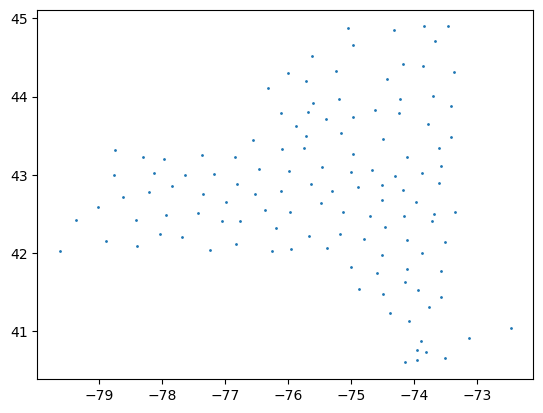

In [5]:
plt.scatter(lat_lon[:, 1], lat_lon[:, 0], s=1)

In [13]:
nn = NearestNeighbors(n_neighbors=3 + 1).fit(lat_lon)
dist,_ = nn.kneighbors(lat_lon, return_distance=True)
dist.shape

(126, 4)

In [38]:
def get_distances(lat_lon: np.ndarray, k: int):
    nn = NearestNeighbors(n_neighbors=k + 1).fit(lat_lon)
    dist, _ = nn.kneighbors(lat_lon, return_distance=True)
    dist = dist[:, 1:]  # Exclude self-distance

    # Convert dist to km (crude)
    dist = dist * np.pi / 180 * 6371  # Earth radius in km

    return dist

In [ ]:
def plot_distances(dist: np.ndarray) -> plt.Figure:
    fig, ax = plt.subplots()
    ax.hist(dist.flatten(), bins=100)
    ax.axvline(np.median(dist), color="red", linestyle="--", label=f"median = {np.median(dist):.2f} km")
    ax.axvline(np.mean(dist), color="black", linestyle="dotted", label=f"mean = {np.mean(dist):.2f} km")
    ax.set_xlabel("Distance (km)")
    ax.legend()
    return fig
    

array([[ 45.27962626,  45.49407656,  53.78034297],
       [ 34.271873  ,  38.84798567,  40.58647751],
       [ 27.90249038,  28.19838352,  30.01889457],
       [ 25.96814152,  31.33859114,  35.95529262],
       [ 35.21196076,  36.36827131,  47.67587638],
       [ 32.17955726,  42.28133636,  47.30533944],
       [ 29.23823917,  39.05628588,  44.21851738],
       [ 31.78963288,  33.26796962,  33.84443802],
       [ 34.04160909,  36.36827131,  40.42291474],
       [ 15.14598906,  19.10357448,  21.88173021],
       [ 43.11066692,  45.30506783,  51.33694936],
       [ 25.63482487,  37.11036141,  42.18661585],
       [ 28.19838352,  38.23314486,  41.42510868],
       [ 14.08585431,  17.62231738,  27.58987497],
       [ 26.83324365,  35.09639088,  38.95738059],
       [ 32.21155118,  34.61385777,  34.95223836],
       [ 35.25587945,  35.28647475,  53.20133435],
       [ 31.37619693,  33.81456265,  36.32655369],
       [ 35.28647475,  49.91955687,  68.36196266],
       [ 18.05075149,  34.78363

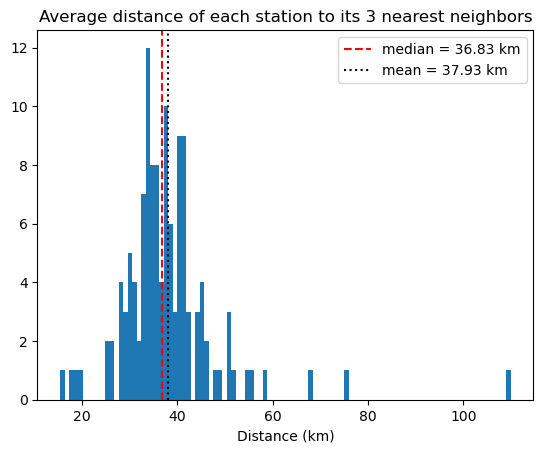

In [36]:
dist = get_distances(lat_lon, k=3)
fig = plot_distances(dist.mean(axis=1))
ax = fig.get_axes()[0]
ax.set_title("Average distance of each station to its 3 nearest neighbors")

dist

In [40]:
def mc_subsample(lat_lon, n_stations: int, n_samples: int):
    n_total, _ = lat_lon.shape
    ind = [np.random.choice(n_total, size=n_stations, replace=False) for _ in range(n_samples)]
    ind = np.array(ind)
    return lat_lon[ind]  # Shape: (n_samples, n_stations, 2)

mc_subsample(lat_lon, n_stations=10, n_samples=10000)

array([[[ 40.767544, -73.964482],
        [ 43.0626  , -74.665437],
        [ 42.40611 , -77.0539  ],
        ...,
        [ 42.756216, -76.534035],
        [ 40.91912 , -73.13168 ],
        [ 42.2395  , -75.17879 ]],

       [[ 44.852869, -74.328874],
        [ 43.054226, -75.990041],
        [ 44.30782 , -76.00858 ],
        ...,
        [ 43.10647 , -75.46146 ],
        [ 43.22668 , -78.30927 ],
        [ 44.19354 , -75.71591 ]],

       [[ 43.03662 , -75.00957 ],
        [ 42.52526 , -75.1369  ],
        [ 42.51178 , -77.43762 ],
        ...,
        [ 43.532408, -75.158597],
        [ 44.32177 , -75.24413 ],
        [ 42.984283, -74.301767]],

       ...,

       [[ 42.24249 , -78.03958 ],
        [ 42.87966 , -76.81255 ],
        [ 41.74505 , -74.58833 ],
        ...,
        [ 41.43993 , -73.57642 ],
        [ 41.9792  , -74.5171  ],
        [ 43.6539  , -73.77736 ]],

       [[ 42.84315 , -74.88961 ],
        [ 43.87469 , -73.41879 ],
        [ 40.872481, -73.893522],
        .

In [105]:
n_stations = 25
k = 3

lat_lon_subsample = mc_subsample(lat_lon, n_stations=n_stations, n_samples=10000)
dist = [get_distances(lat_lon_subsample[i], k=k) for i in range(lat_lon_subsample.shape[0])]
dist = np.array(dist)
dist.shape

(10000, 25, 3)

In [106]:
dist = dist.mean(axis=2)
dist.shape

(10000, 25)

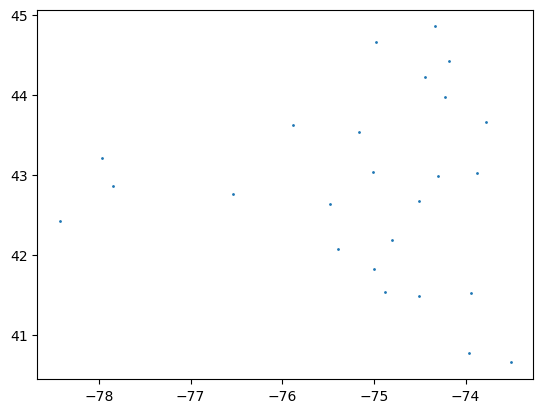

In [107]:
i = 1
plt.scatter(lat_lon_subsample[i, :, 1], lat_lon_subsample[i, :, 0], s=1)

Text(0.5, 1.0, 'Average distance of each station to its 3 nearest neighbors (n_stations=25)')

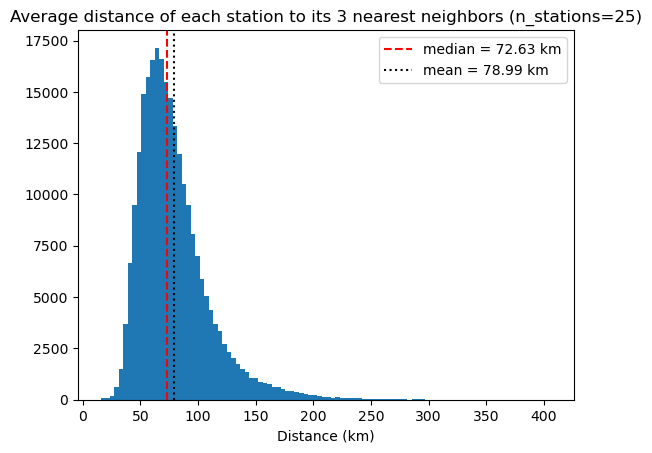

In [108]:
fig = plot_distances(dist)
ax = fig.get_axes()[0]
ax.set_title(f"Average distance of each station to its {k} nearest neighbors (n_stations={n_stations})")

In [46]:
from sklearn.neighbors import BallTree

def get_distances(lat_lon: np.ndarray, k: int):
    # Convert degrees to radians
    lat_lon_rad = np.radians(lat_lon)
    
    # Use haversine metric in BallTree
    tree = BallTree(lat_lon_rad, metric='haversine')
    dist, _ = tree.query(lat_lon_rad, k=k + 1)
    dist = dist[:, 1:]  # Exclude self-distance

    # Convert radians to km (Earth radius = 6371 km)
    dist_km = dist * 6371

    return dist_km


array([[34.04549638],
       [31.72720302],
       [25.07482327],
       [20.92235804],
       [28.54441041],
       [26.58267291],
       [28.44776198],
       [29.04743436],
       [25.3982366 ],
       [15.12571581],
       [34.44452972],
       [21.46421163],
       [25.07482327],
       [13.10755661],
       [22.94589249],
       [25.42878837],
       [33.73494782],
       [23.16911186],
       [35.25949025],
       [17.89214656],
       [33.98002176],
       [26.51140863],
       [34.16331278],
       [29.22442218],
       [26.69613466],
       [31.19116309],
       [48.64155494],
       [22.01698778],
       [27.48713566],
       [25.10430936],
       [33.5849731 ],
       [14.532896  ],
       [31.52104638],
       [29.27489896],
       [36.38989858],
       [25.89965259],
       [35.98502073],
       [22.68212583],
       [33.73494782],
       [29.9083549 ],
       [36.47739504],
       [31.96528651],
       [24.99588904],
       [33.4646777 ],
       [39.71514396],
       [30

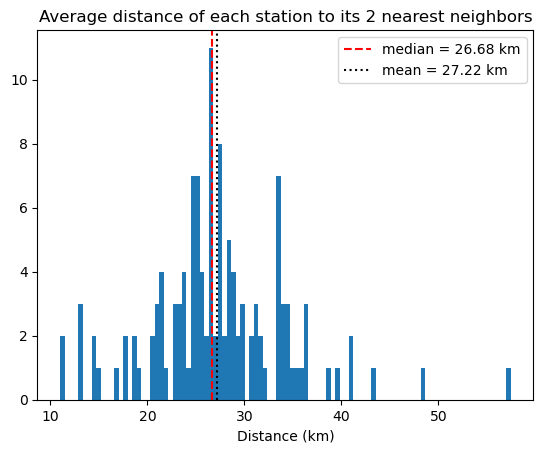

In [47]:
k=1
dist = get_distances(lat_lon, k=1)
fig = plot_distances(dist.mean(axis=1))
ax = fig.get_axes()[0]
ax.set_title(f"Average distance of each station to its {k+1} nearest neighbors")

dist

In [81]:
# Plotting function
def plot_distances(ax, dist: np.ndarray, n_stations: int, fontsize: int = 16,xlabel: str = "Distance (km)", ylabel: str = "Frequency",title: str = None):
    ax.hist(dist.flatten(), bins=100)
    ax.axvline(np.median(dist), color="red", linestyle="--",
               label=f"{'median':<6} = {np.median(dist):.2f} km")
    ax.axvline(np.mean(dist), color="black", linestyle="dotted",
               label=f"{'mean':<7} = {np.mean(dist):.2f} km")
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=fontsize)
    else:
        ax.set_xlabel("", fontsize=fontsize)
    if ylabel is not None: 
        ax.set_ylabel(ylabel, fontsize=fontsize)
    else:
        ax.set_ylabel("", fontsize=fontsize)
    if title is not None:
        ax.set_title(title, fontsize=fontsize)
    ax.legend(fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize)

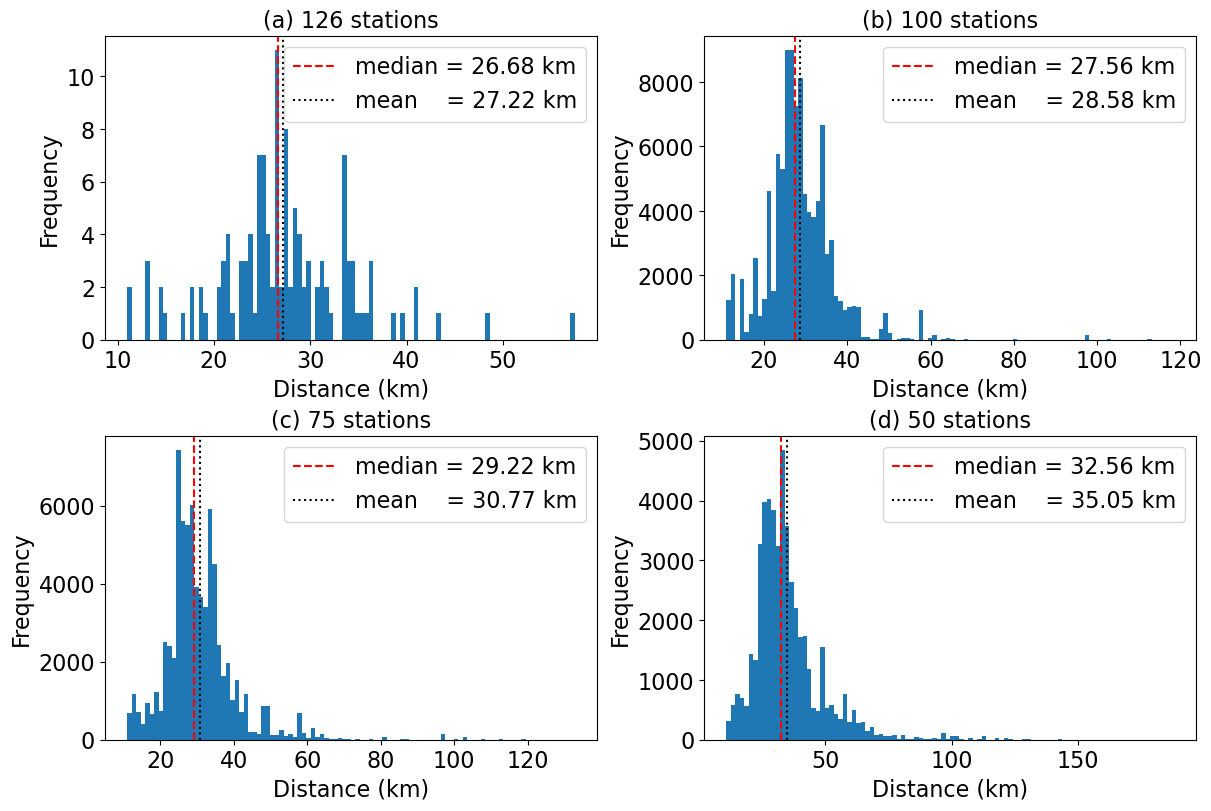

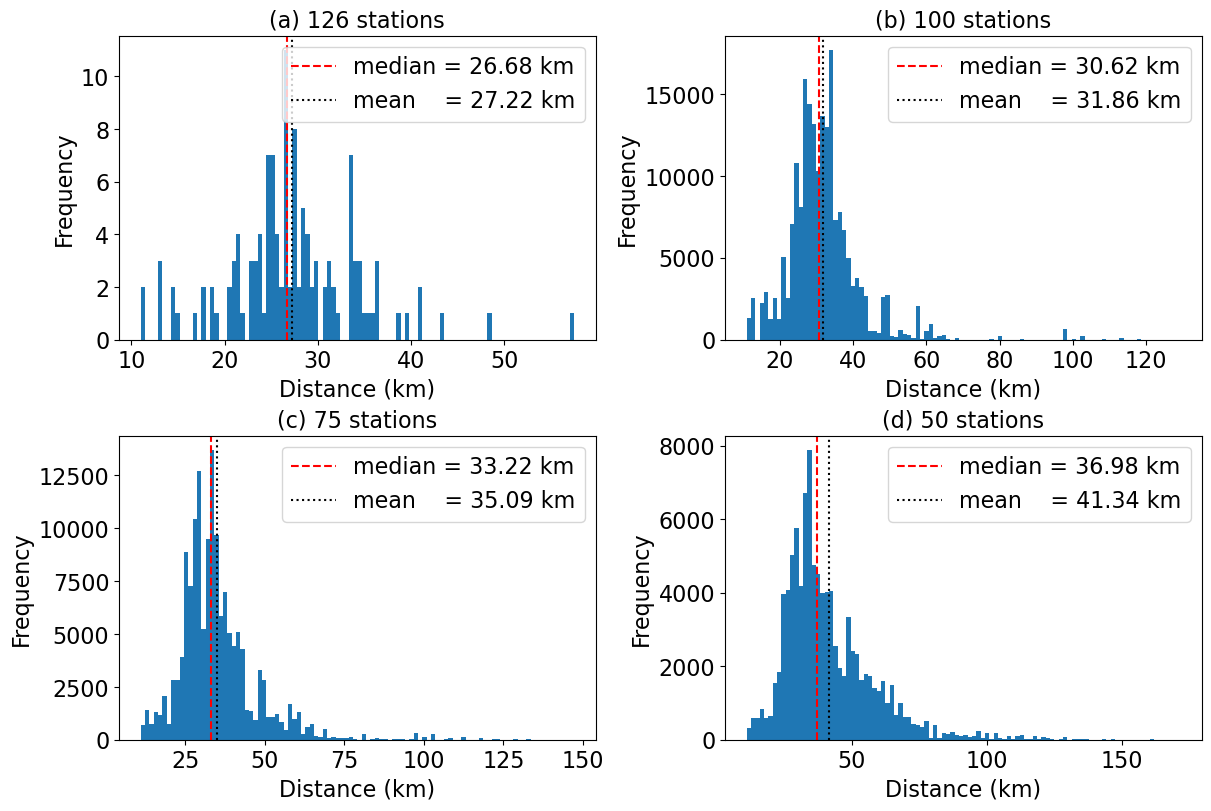

In [82]:
# Parameters
for k in [1,2]:
    fontsize = 16
    n_stations_list = [126, 100, 75, 50]

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

    for i,(ax, n_stations) in enumerate(zip(axes.flatten(), n_stations_list)):
        if n_stations == n_stations_list[0]:
            dist = get_distances(lat_lon, k=1)
        else:
            lat_lon_subsample = mc_subsample(lat_lon, n_stations=n_stations, n_samples=1000)
            dist = [get_distances(lat_lon_subsample[i], k=k) for i in range(lat_lon_subsample.shape[0])]
            dist = np.array(dist)
        xlabel = "Distance (km)" 
        ylabel = "Frequency" 
        title = f"({small_alphabets[i]}) {n_stations} stations"
        plot_distances(ax, dist, n_stations=n_stations, fontsize=fontsize, xlabel=xlabel, ylabel=ylabel, title=title)

    plt.savefig(f"{FIG_DIR}/nysm_distances_{k}_neighbors.png", dpi=300, bbox_inches='tight')
